### 회귀
- 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있다.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을  Simple Linear Regression이라고 함. (지도학습)
- 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘이라고 한다.

In [30]:




import statsmodels.formula.api as smf
import statsmodels.api as sm

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [31]:
df = pd.read_excel('../Data/auto-mpg.xlsx')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [32]:
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [58]:
ndf['horsepower'] = ndf['horsepower'].replace('?',np.nan)
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)
ndf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   cylinders   398 non-null    int64  
 2   horsepower  398 non-null    float64
 3   weight      398 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.5 KB


<ipython-input-58-1a37f1f3511c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['horsepower'] = ndf['horsepower'].replace('?',np.nan)
D:\Tools\Anaconda3\envs\cakd3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


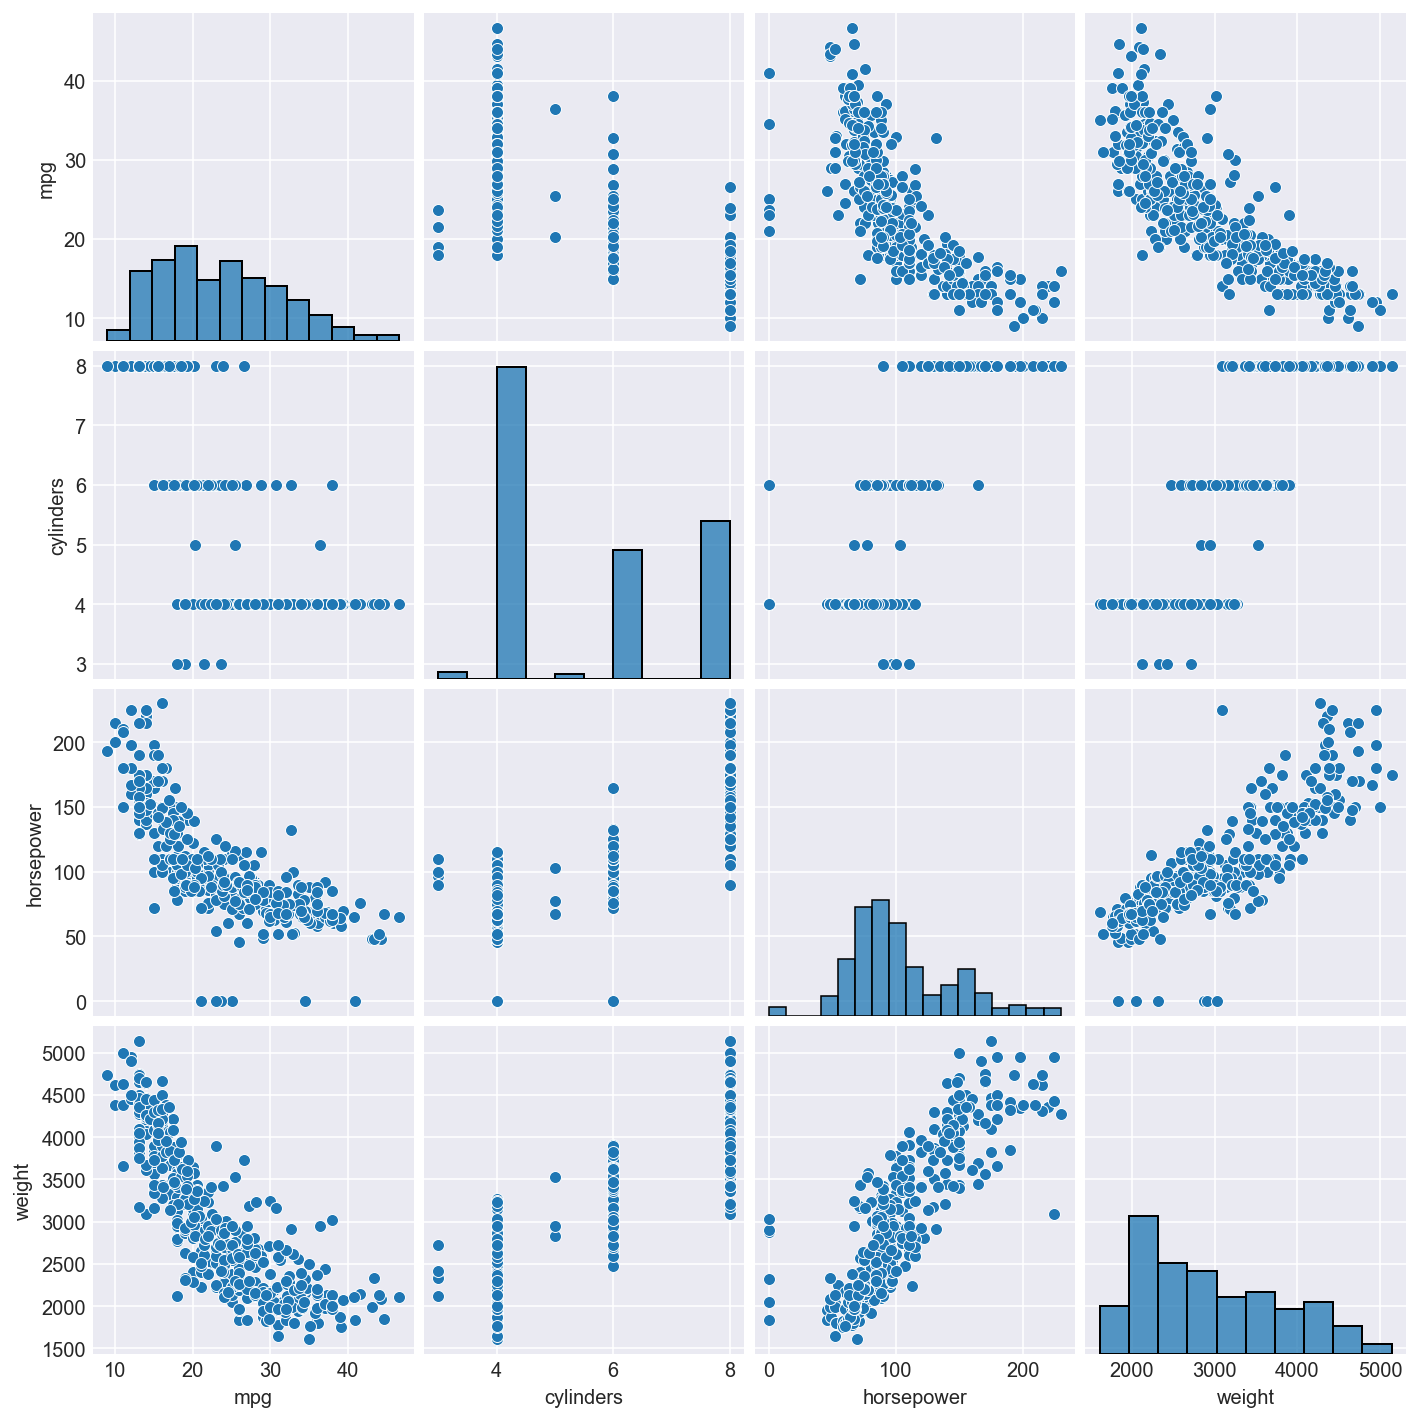

In [79]:
sns.pairplot(ndf)

In [59]:
# 변수(속성) 선택

X = ndf[['weight']] # 독립변수
y = ndf['mpg'] # 종속변수

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state=11)

In [60]:
from sklearn.linear_model import LinearRegression # 선형회귀

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
y_preds[:5]

array([28.89010936, 25.72371454, 23.57369337, 30.571035  , 14.22305584])

### 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것 (실제 오류 평균보다 커지는 것 보정)
- R square : 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함

In [61]:
from sklearn.metrics import mean_squared_error, r2_score # MSE
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:19.135, RMSE:4.374, R2 score:0.674


In [62]:
lr.coef_

array([-0.00781826])

In [63]:
print('기울기 a :' ,lr.coef_)
print('절편 b :',lr.intercept_)

기울기 a : [-0.00781826]
절편 b : 46.598465559315656


<AxesSubplot:ylabel='Frequency'>

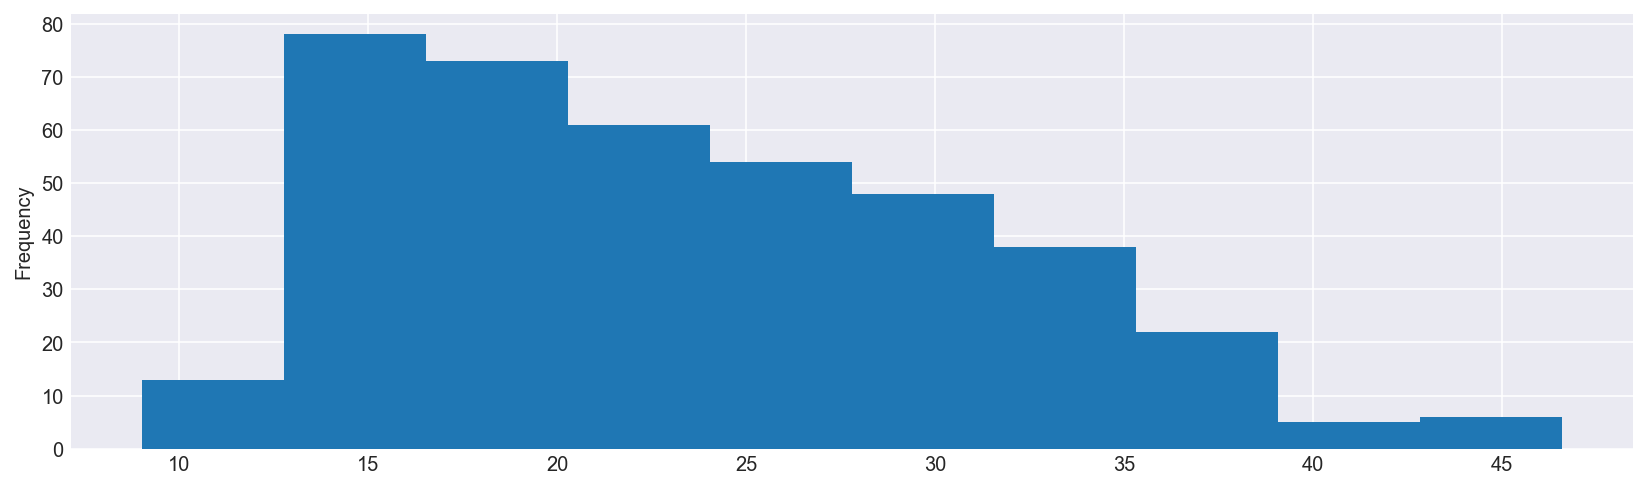

In [64]:
y.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

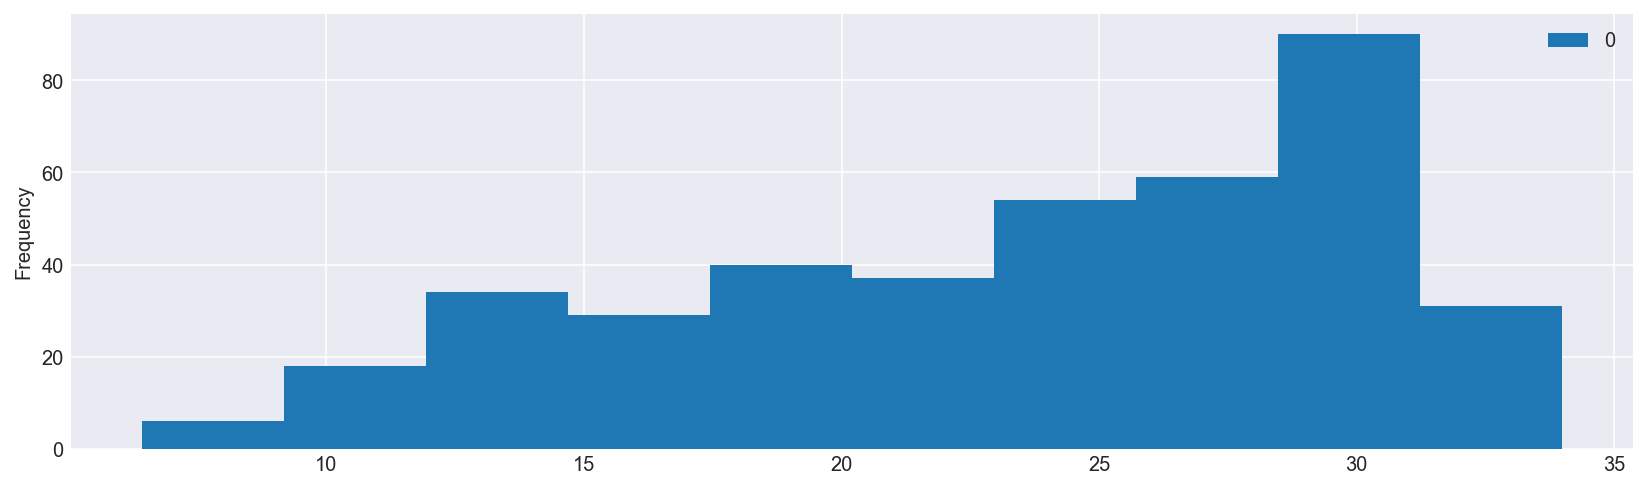

In [65]:
y_hat = lr.predict(X)
pd.DataFrame(y_hat).plot(kind='hist')

D:\Tools\Anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Tools\Anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


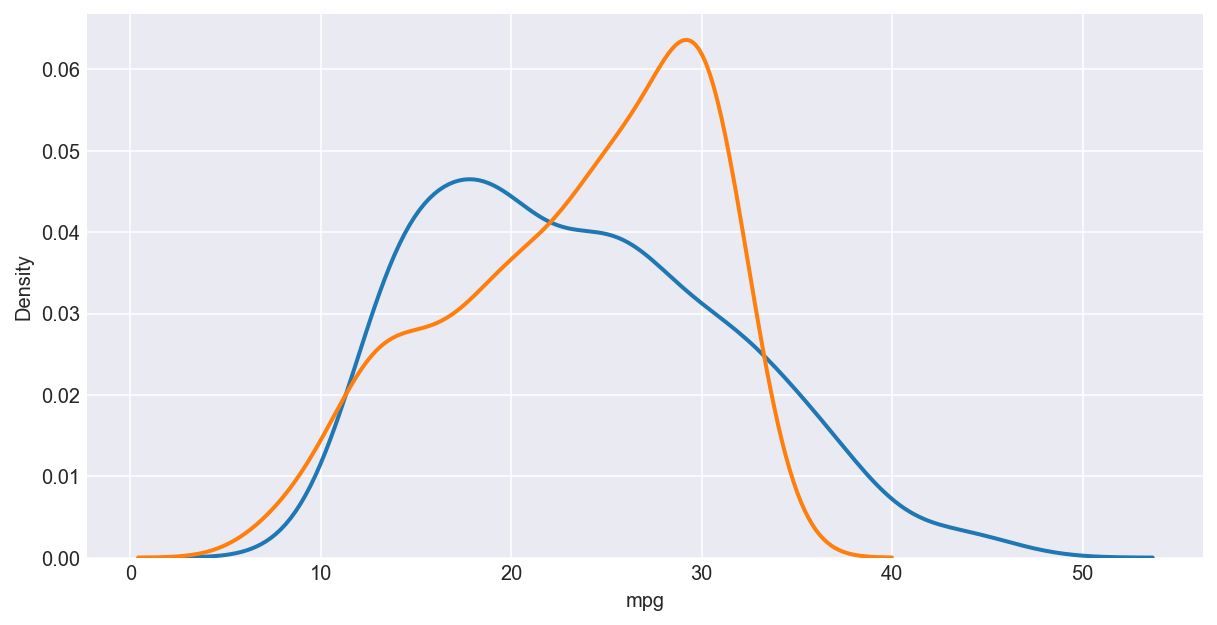

In [66]:
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False, label = "y")
ax2 = sns.distplot(y_hat,hist=False,label='y_hat')

### 다항회귀분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선형태의 회귀선을 표현할 수 있다.
- 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘.
- 다항 회귀도 선형회쉬이다. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관하다.

In [67]:
# 변수(속성) 선택

X = ndf[['weight']] # 독립변수
y = ndf['mpg'] # 종속변수

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state=11)

In [68]:
from sklearn.preprocessing import PolynomialFeatures #다항식 변환
poly = PolynomialFeatures(degree=2) # 2차항 적용
X_train_poly = poly.fit_transform(X_train) # X_train 데이터를 2차항으로 변환.
print(X_train.shape)
print(X_train_poly.shape)
print(X_train_poly[:5])

(278, 1)
(278, 3)
[[1.0000000e+00 4.6540000e+03 2.1659716e+07]
 [1.0000000e+00 3.4250000e+03 1.1730625e+07]
 [1.0000000e+00 2.7950000e+03 7.8120250e+06]
 [1.0000000e+00 2.9050000e+03 8.4390250e+06]
 [1.0000000e+00 2.5720000e+03 6.6151840e+06]]


In [69]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train)
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
r_square

0.657907657484687

Text(0, 0.5, 'mpg')

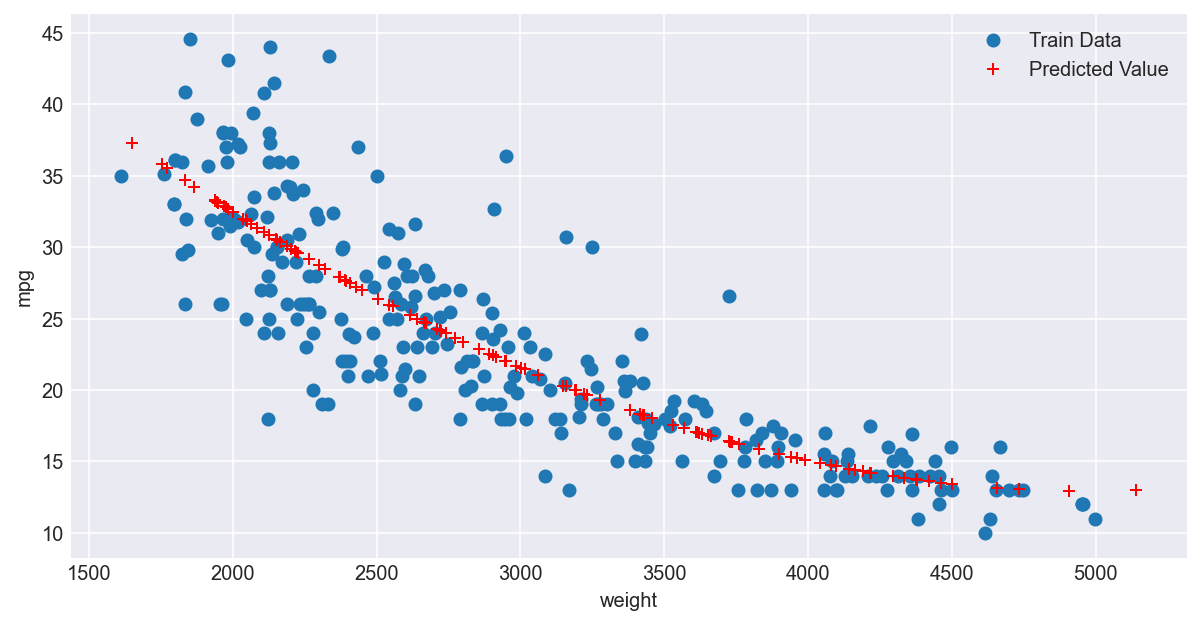

In [70]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label ='Train Data')
ax.plot(X_test,y_hat_test, 'r+', label = "Predicted Value")
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')

In [71]:
from sklearn.metrics import mean_squared_error, r2_score # MSE
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
y_preds_poly = pr.predict(X_test_poly)
r2_square = r2_score(y_test,y_preds_poly)
r2_square


0.657907657484687

D:\Tools\Anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Tools\Anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


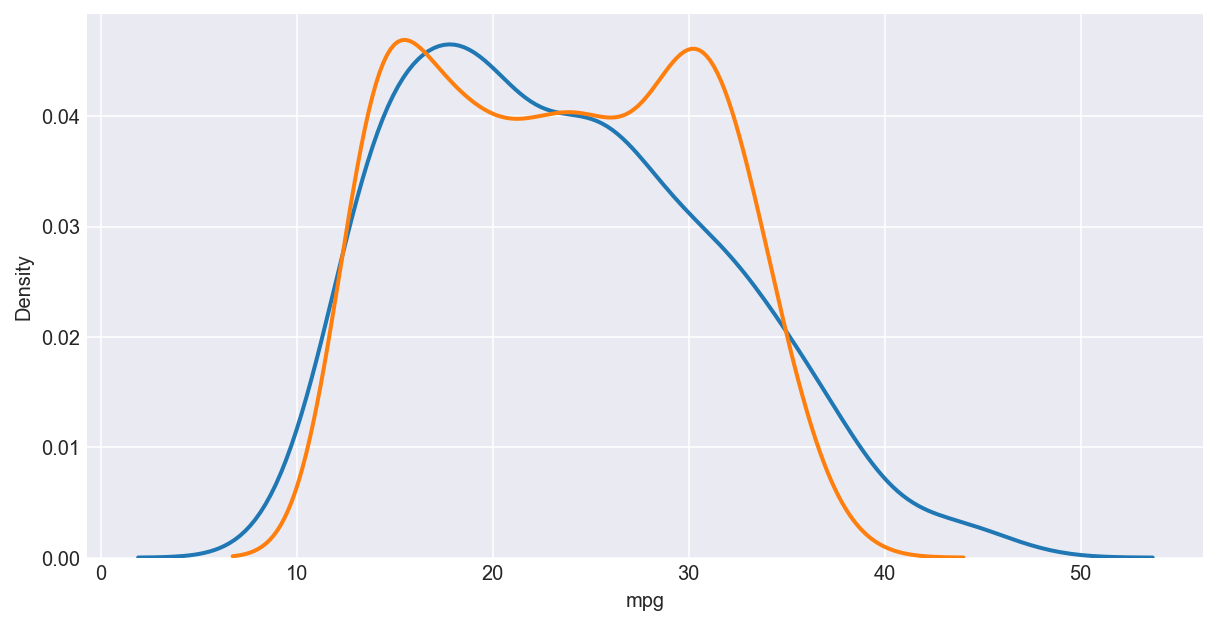

In [72]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.distplot(y,hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')


### 다중 회귀분석
- 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습을 의미.

In [73]:
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [80]:
X=ndf[['cylinders','horsepower','weight']]
y=ndf['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=0)
lr= LinearRegression()
lr.fit(X_train, y_train)
y_preds= lr.predict(X_test)

r2= r2_score(y_test,y_preds)
mse= mean_squared_error(y_test,y_preds)
rmse= np.sqrt(mse)

print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:17.918, RMSE:4.233, R2 score:0.720


In [81]:
print('X변수의 계수:',lr.coef_)
print('절편:',lr.intercept_)

X변수의 계수: [-0.2438096  -0.03784595 -0.00563083]
절편: 45.388811924824026


D:\Tools\Anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Tools\Anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


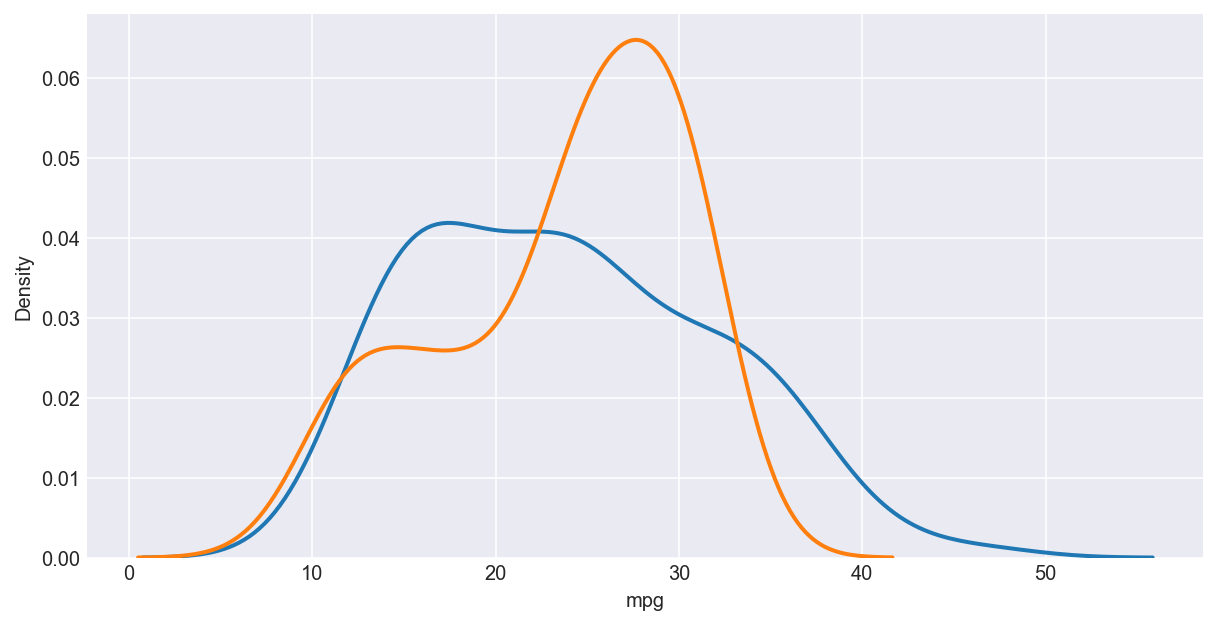

In [83]:
y_hat= lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1= sns.distplot(y_test, hist=False, label='y_test')
ax2= sns.distplot(y_hat, hist=False, label='y_hat')

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ndf_ms = scaler.fit_transform(ndf)
ndf_ms_df = pd.DataFrame(data=ndf_ms, columns =ndf.columns)
ndf_ms_df.head()

,mpg,cylinders,horsepower,weight
0,0.239362,1.0,0.565217,0.536150
1,0.159574,1.0,0.717391,0.589736
2,0.239362,1.0,0.652174,0.516870
3,0.186170,1.0,0.652174,0.516019
4,0.212766,1.0,0.608696,0.520556


In [85]:
X = ndf_ms_df[['cylinders', 'horsepower','weight']]
y = ndf_ms_df['mpg']

# 훈련용, 검정용 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
r2 = r2_score(y_test, y_preds)
r2


0.7196071421115569

D:\Tools\Anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Standard Transformed npg histogram'}, xlabel='mpg', ylabel='Density'>

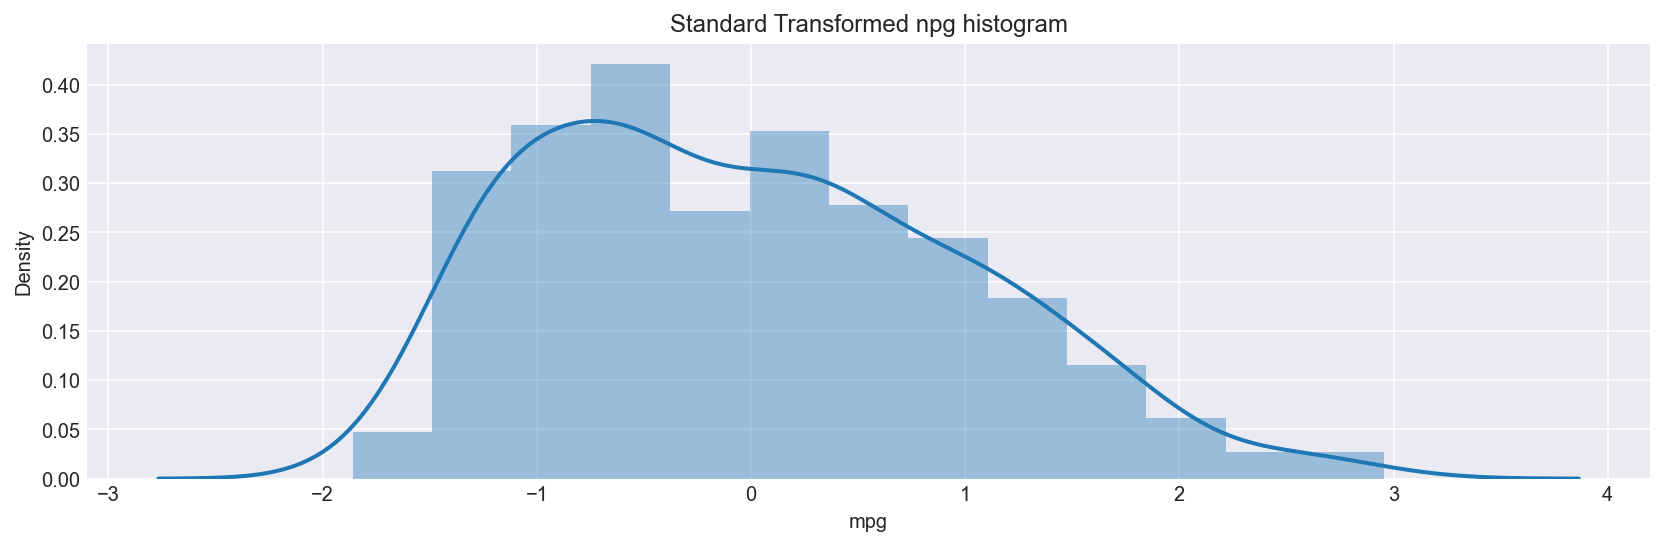

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ndf_ms = scaler.fit_transform(ndf)
ndf_ms_df = pd.DataFrame(data=ndf_ms,columns=ndf.columns)
plt.title('Standard Transformed npg histogram')
sns.distplot(ndf_ms_df.mpg)

D:\Tools\Anaconda3\envs\cakd3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

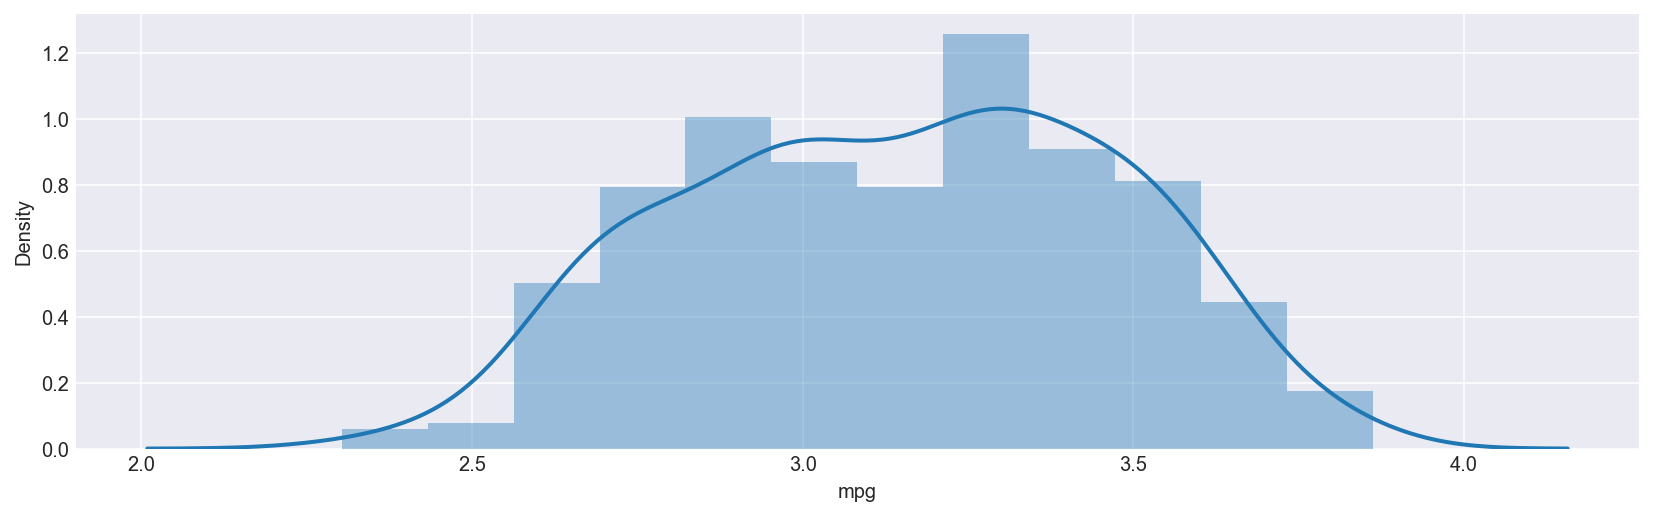

In [90]:
log_mpg = np.log1p(ndf['mpg'])
sns.distplot(log_mpg)